In [14]:
# coding: utf-8
import sys, os # OSでディレクトリを変更したりするためのパッケージをインポート
#sys.path.append(os.pardir)　#１つ上の階層のディレクトリ内にあるものを読み込めるようにしておけ、という命令（今回はdeep-learning-from-scratch-master）
sys.path.append(os.pardir)

import numpy as np
from dataset.mnist import load_mnist#mnist.pyの中に書かれている関数を使えるようにしろ、という命令、後半はその中からload_mnistをもってこいと命令
from two_layer_net import TwoLayerNet

W1history=[]
W2history=[]

# データの読み込み　
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)#番地に名前をつけて、環境変数とした
network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)#初期化したネットワークを生成

iters_num = 10000 #バッチの繰り返し回数
train_size = x_train.shape[0] #訓練データの数
batch_size = 100#１つのバッチに入っている訓練データの数　　100＊10000の文字読み込みして1つの文字につき、１回の順伝播と逆伝播をする＊延べ１００万回
learning_rate = 0.1#勾配降下する際の掛け率

train_loss_list = []# ここでは枠だけ作っている
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)#訓練データ60,000/バッチサイズ１００  600バッチ繰り返し/1epoch

for i in range(iters_num):#イテレーションの数（600バッチ繰り返し）が600の倍数だった場合に以下のことを行え
    if (i%600)==0:
        seed=np.arange(60000)#重複ない6万文字の並び替えをした
        np.random.shuffle(seed)#seedを作成、seedは１epochに使う教師データの順番を記録している
    
    batch_mask=seed[(i%600)*100:((i%600)*100+100)]#１epoch内で１００文字ごとに区切り１バッチにしている
#    batch_mask = np.random.choice(train_size, batch_size) # 0〜５９，９９９の整数のうち、バッチサイズの数分、ランダムに取り出せ（重複あり）　⭐️
    x_batch = x_train[batch_mask]#batch_mask できめた番号のデータをx_batch という環境変数に入れる
    t_batch = t_train[batch_mask]#batch_mask の番号に従った取り出し方をした被説明変数（訓練ラベル）のみのリストで、上の説明変数の順序に対応
    
    # 勾配
    #grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch)
    
    # 更新
    #W1history.append(network.params['W1'])#1バッチごとにW1history.に行列（weight matrix）を記録（アペンド）
    #W2history.append(network.params['W2'])#1バッチごとにW2history.に行列（weight matrix）を記録（アペンド）

    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    hogehoge=network.params['W1']
    fugafuga=network.params['W2']
    W1history=W1history+[hogehoge.copy()]#1バッチごとにW1history.に行列（weight matrix）を記録（リストの追加＋）
    #.copyをつけて、値のidを書き換えてやらなきゃいけない
    
    W2history=W2history+[fugafuga.copy()]#1バッチごとにW2history.に行列（weight matrix）を記録（リストの追加＋）

    
    if i % iter_per_epoch == 0:#イテレーションの数（600バッチ繰り返し）が600の倍数だった場合に以下のことを行え
 
        train_acc = network.accuracy(x_train, t_train)#two_layer_net.pyを参照
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)#.appendはlist（train_acc）の後ろに新しい数字を加えろ（今回はtrain_acc）　６００バッチ(1epoch)ごとに正答率だせ
        test_acc_list.append(test_acc)
        # 更新
        print(train_acc, test_acc)#10000バッチ/600バッチ＝16.7epochが出力されている
        #print(train_acc, test_acc,network.params['W1'][40][23],hogehoge[40][23])#10000バッチ/600バッチ＝16.7epochが出力されている

0.09976666666666667 0.1005
0.9051 0.9085
0.92085 0.9242
0.9369333333333333 0.9365
0.9461666666666667 0.9439
0.9516333333333333 0.95
0.9565833333333333 0.953
0.9614666666666667 0.957
0.9649166666666666 0.9612
0.9673333333333334 0.962
0.9706166666666667 0.9644
0.9715 0.9663
0.9744 0.9676
0.9754166666666667 0.9674
0.9771333333333333 0.9695
0.9771 0.9674
0.9787666666666667 0.9696


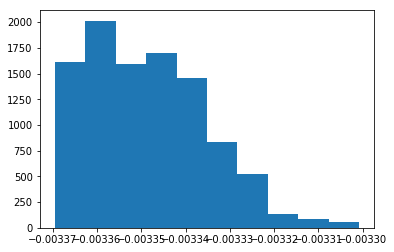

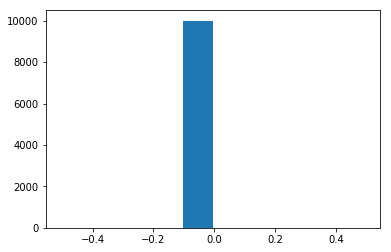

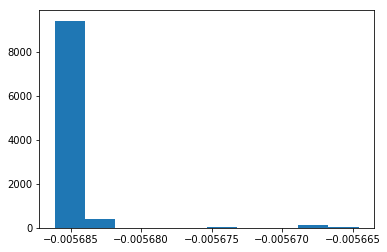

[-0.00330285 -0.00330285 -0.00330285 ... -0.00336952 -0.00336952
 -0.00336952]


In [20]:
import matplotlib.pyplot

def W1histcreator(gyo,retsu,debug=False):# W1の行と列を指定してその重みの時間変化を配列として出力する関数を定義している。
    hoge=[]
    for i in range(len(W1history)): #W1historyの長さを変えても対応できるようにソフトコーディングした。
        fuga=W1history[i][gyo][retsu]
        hoge=hoge+ [fuga.copy()]
       
    piyo=np.array(hoge.copy())
    if debug==False:
        matplotlib.pyplot.hist(piyo.copy())
        matplotlib.pyplot.show()
    return piyo

hogera=W1histcreator(60,23)#試し打ちして確認している　よく変化する場所

W1histcreator(30,23)#全く変わらない場所
W1histcreator(50,3)#変化が少ない場所
print(hogera)

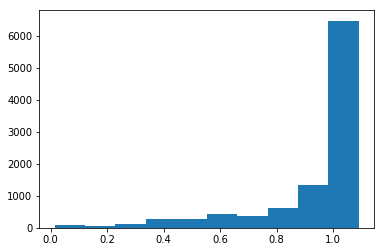

array([0.01433683, 0.01452648, 0.01389647, ..., 1.0758599 , 1.07557335,
       1.07521708])

In [21]:
import matplotlib.pyplot

def W2histcreator(gyo,retsu,debug=False): #W2の行と列を指定してその重みの時間変化を配列として出力する関数を定義している。
    hoge=[]
    for i in range(len(W2history)): #W2historyの長さを変えても対応できるようにソフトコーディングした。
        fuga=W2history[i][gyo][retsu]
        hoge=hoge+ [fuga.copy()]
       
    piyo=np.array(hoge.copy())
    if debug==False:
        matplotlib.pyplot.hist(piyo.copy())
        matplotlib.pyplot.show()
    return piyo

W2histcreator(3,2)#試し打ちして確認している　


['W1', 0, 0]


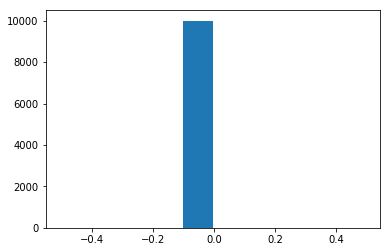

['W1', 0, 1]


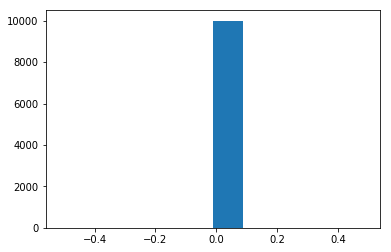

['W1', 0, 2]


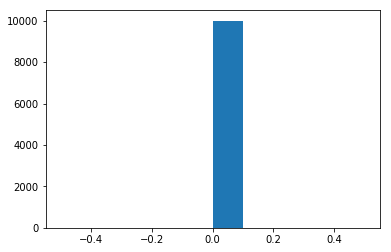

['W1', 0, 3]


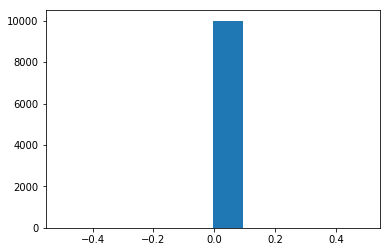

['W1', 0, 4]


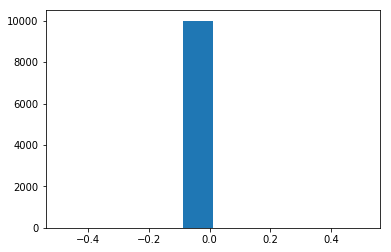

['W1', 0, 5]


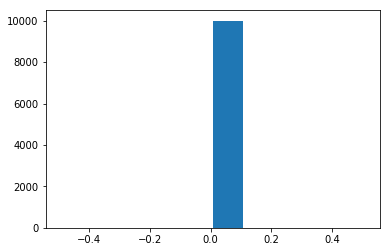

['W1', 0, 6]


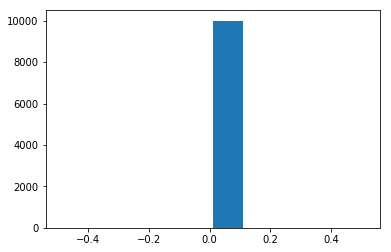

['W1', 0, 7]


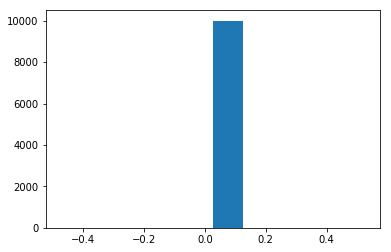

['W1', 0, 8]


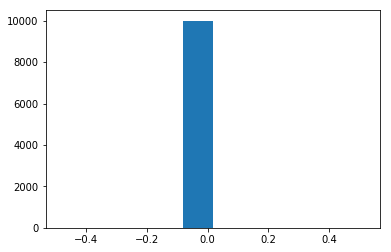

['W1', 0, 9]


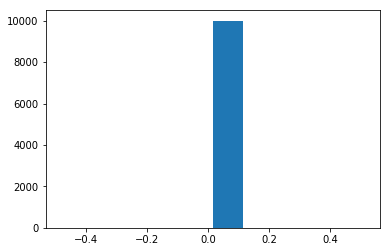

['W1', 0, 10]


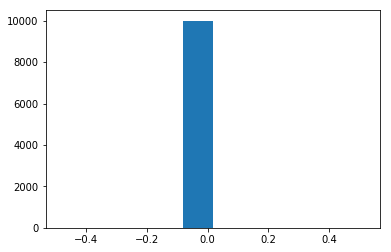

['W1', 0, 11]


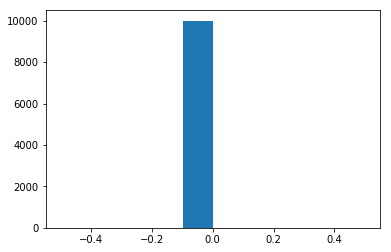

['W1', 0, 12]


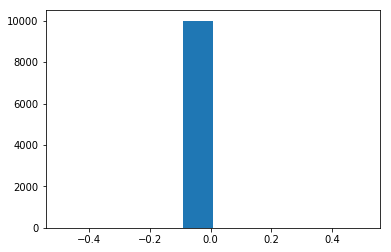

['W1', 0, 13]


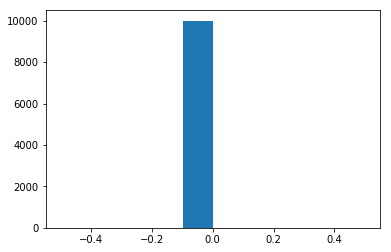

['W1', 0, 14]


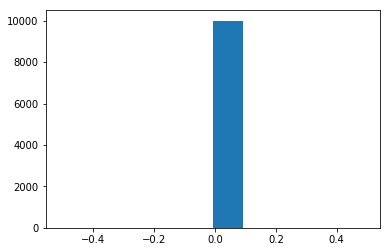

['W1', 0, 15]


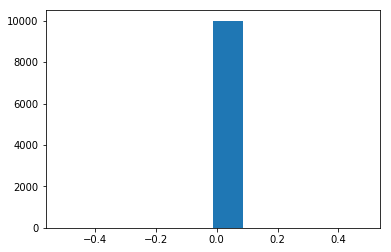

['W1', 0, 16]


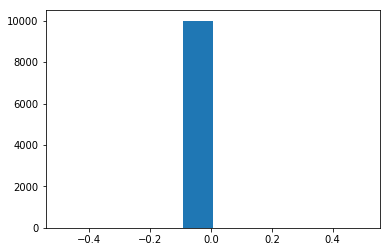

['W1', 0, 17]


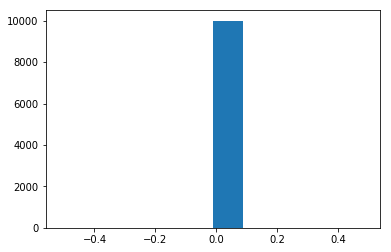

['W1', 0, 18]


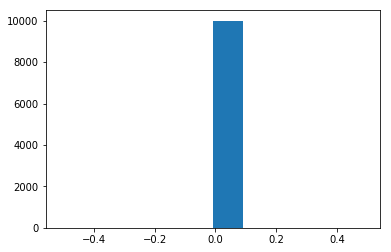

['W1', 0, 19]


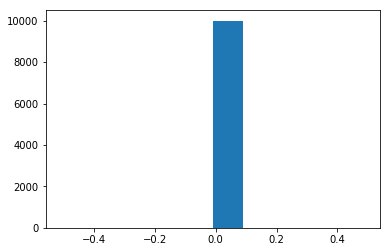

['W1', 0, 20]


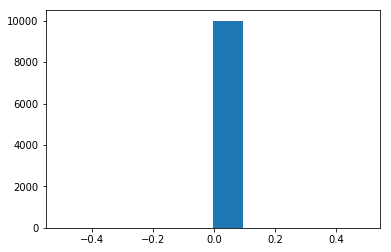

['W1', 0, 21]


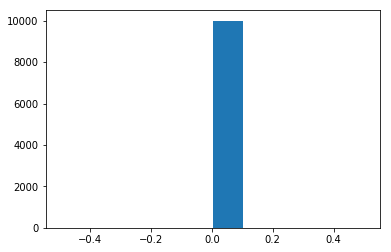

['W1', 0, 22]


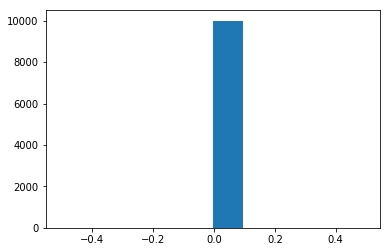

['W1', 0, 23]


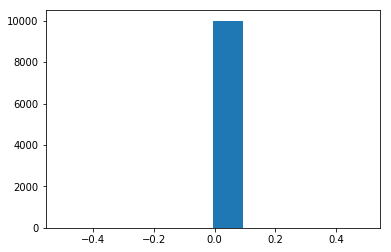

['W1', 0, 24]


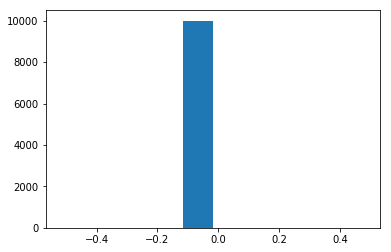

['W1', 0, 25]


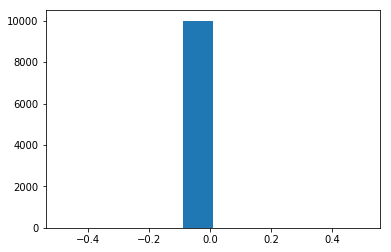

['W1', 0, 26]


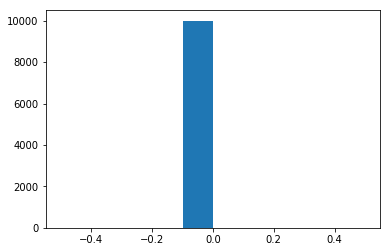

['W1', 0, 27]


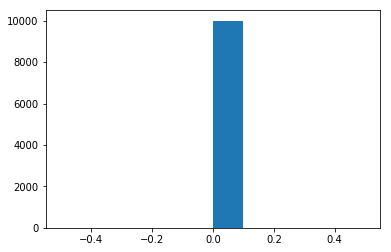

['W1', 0, 28]


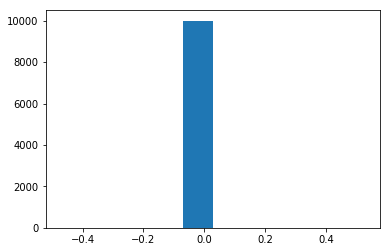

['W1', 0, 29]


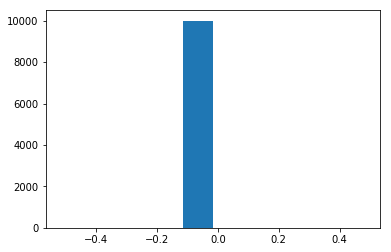

['W1', 0, 30]


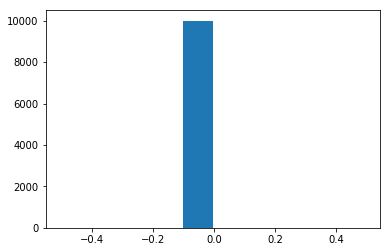

['W1', 0, 31]


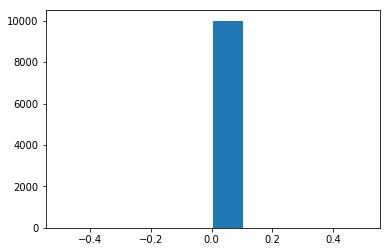

['W1', 0, 32]


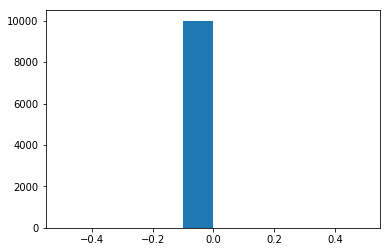

['W1', 0, 33]


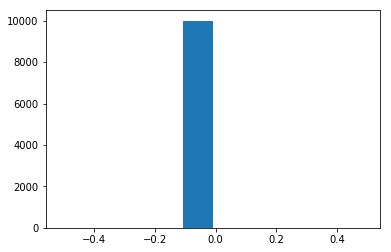

['W1', 0, 34]


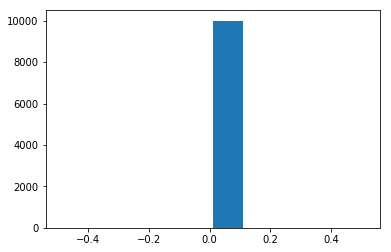

['W1', 0, 35]


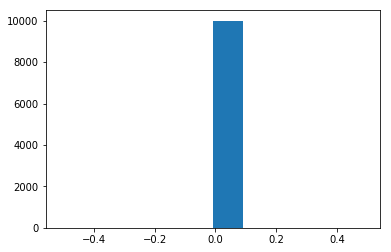

['W1', 0, 36]


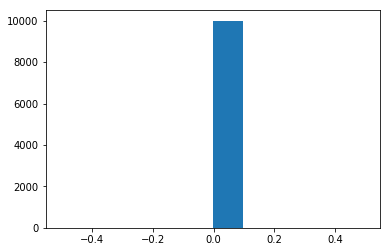

['W1', 0, 37]


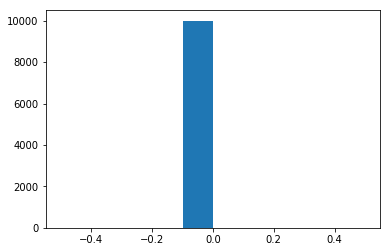

['W1', 0, 38]


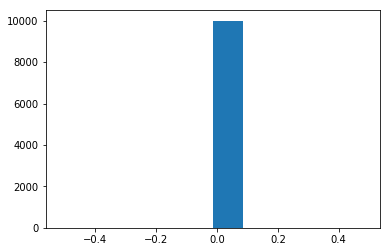

['W1', 0, 39]


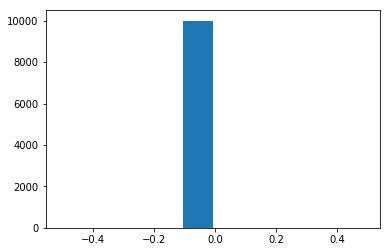

['W1', 0, 40]


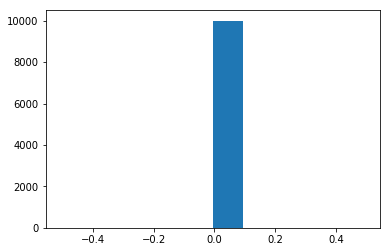

['W1', 0, 41]


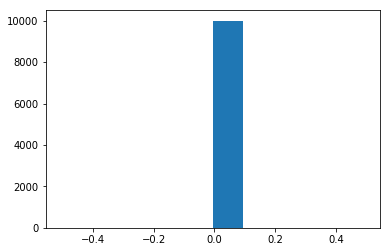

['W1', 0, 42]


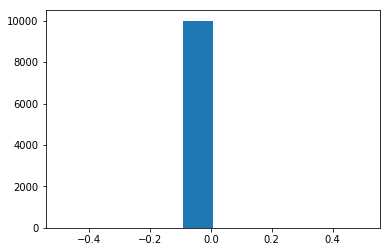

['W1', 0, 43]


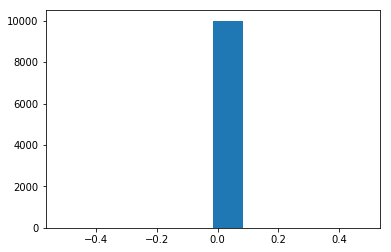

['W1', 0, 44]


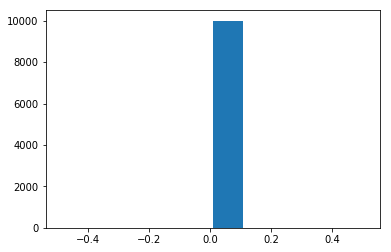

['W1', 0, 45]


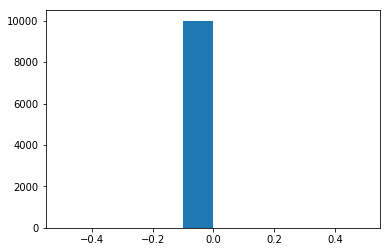

['W1', 0, 46]


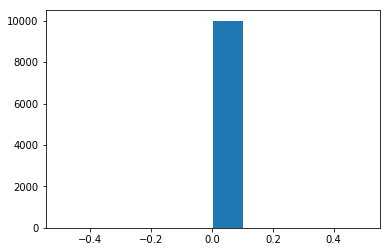

['W1', 0, 47]


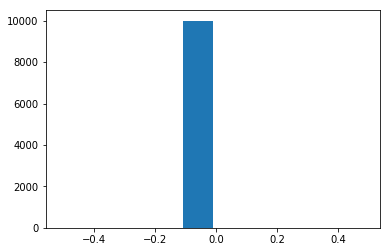

['W1', 0, 48]


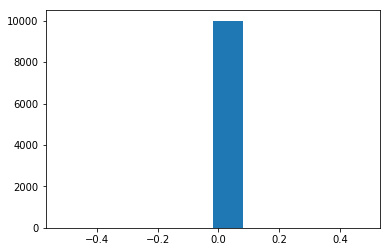

['W1', 0, 49]


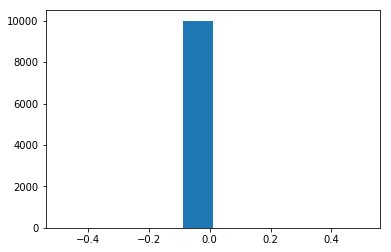

['W1', 1, 0]


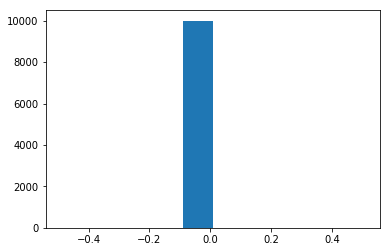

['W1', 1, 1]


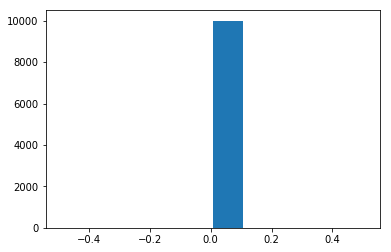

['W1', 1, 2]


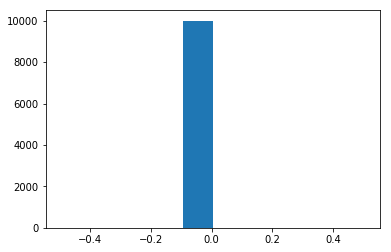

['W1', 1, 3]


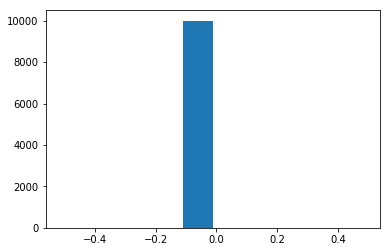

['W1', 1, 4]


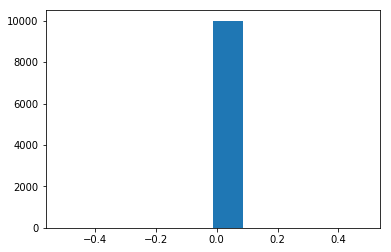

['W1', 1, 5]


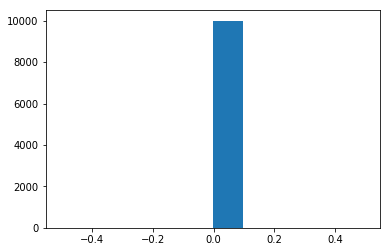

['W1', 1, 6]


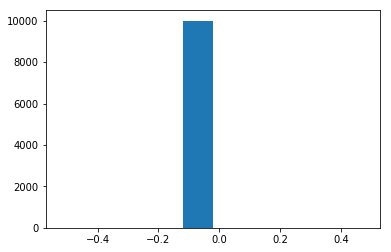

['W1', 1, 7]


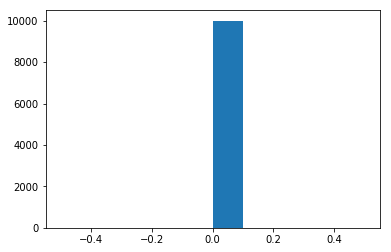

['W1', 1, 8]


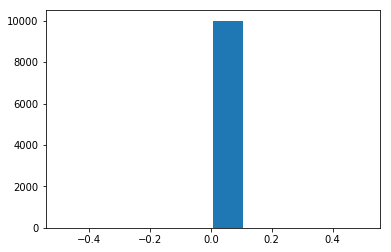

['W1', 1, 9]


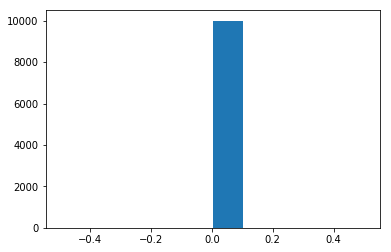

['W1', 1, 10]


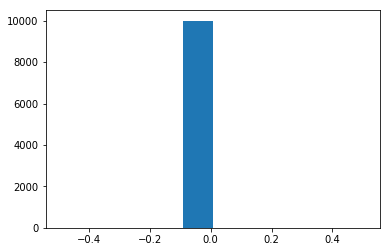

['W1', 1, 11]


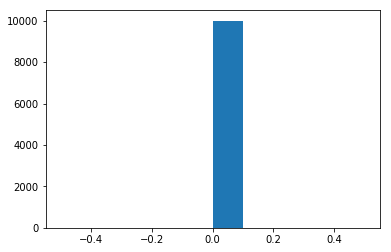

['W1', 1, 12]


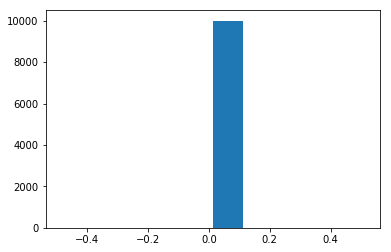

['W1', 1, 13]


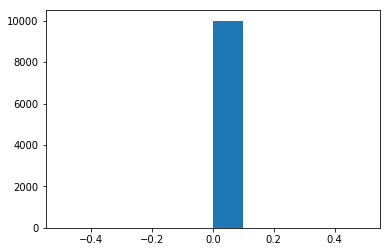

['W1', 1, 14]


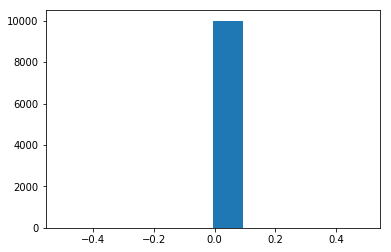

['W1', 1, 15]


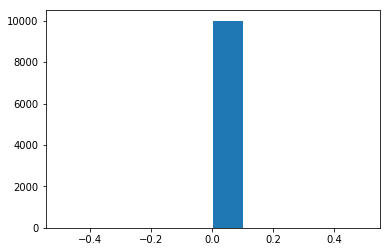

['W1', 1, 16]


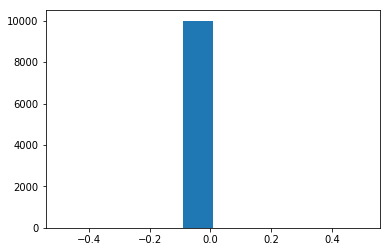

['W1', 1, 17]


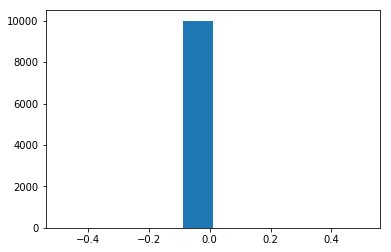

['W1', 1, 18]


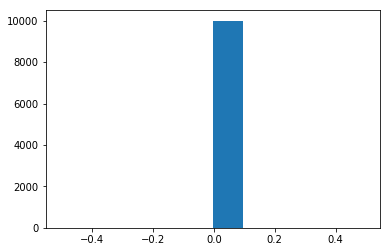

['W1', 1, 19]


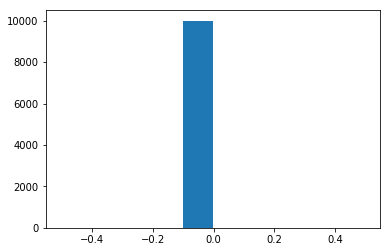

['W1', 1, 20]


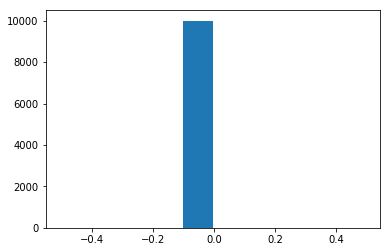

['W1', 1, 21]


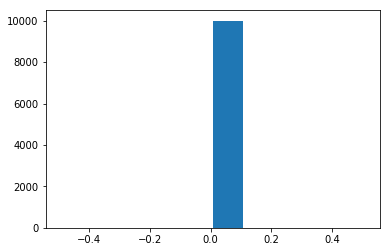

['W1', 1, 22]


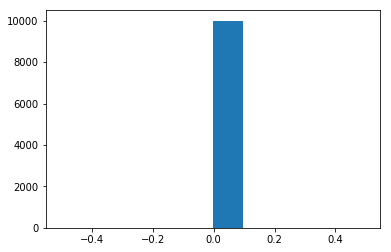

['W1', 1, 23]


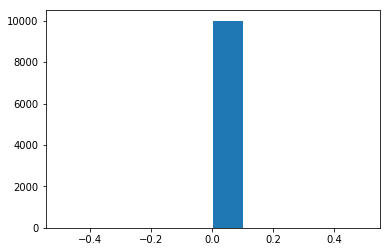

['W1', 1, 24]


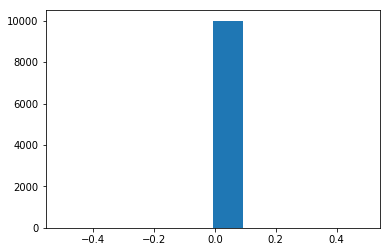

['W1', 1, 25]


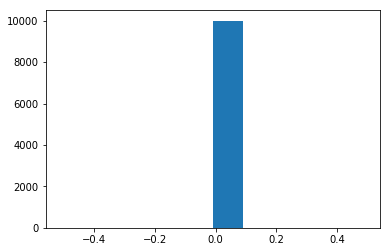

['W1', 1, 26]


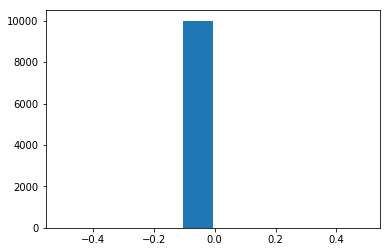

['W1', 1, 27]


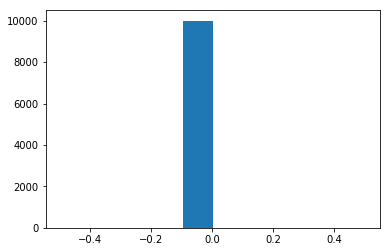

['W1', 1, 28]


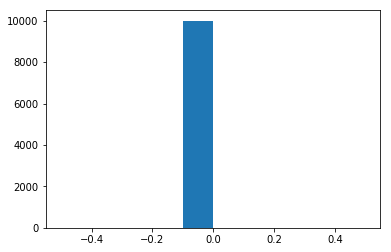

['W1', 1, 29]


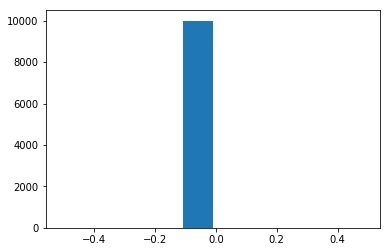

['W1', 1, 30]


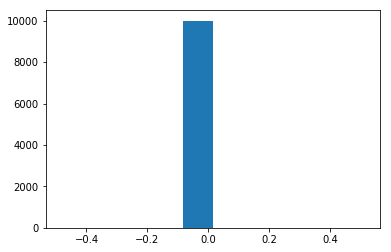

['W1', 1, 31]


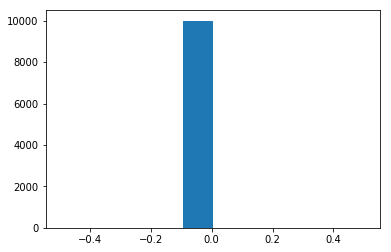

['W1', 1, 32]


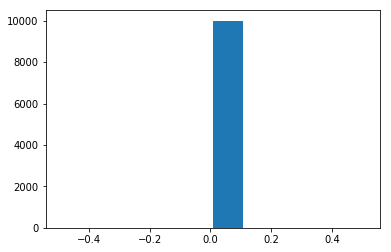

['W1', 1, 33]


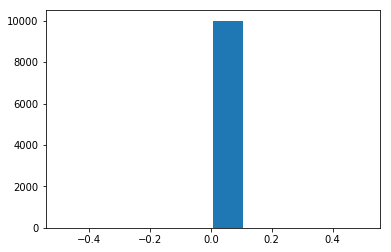

['W1', 1, 34]


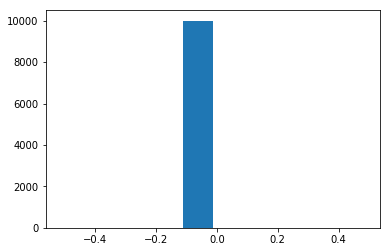

['W1', 1, 35]


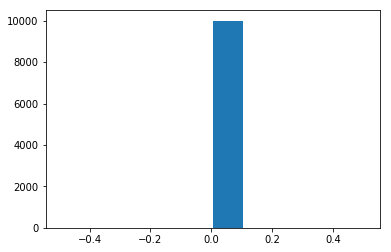

['W1', 1, 36]


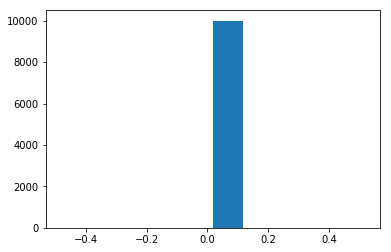

['W1', 1, 37]


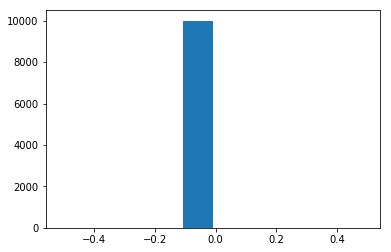

['W1', 1, 38]


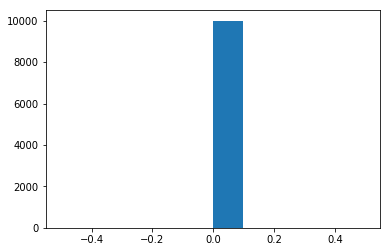

['W1', 1, 39]


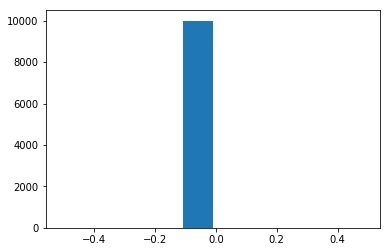

['W1', 1, 40]


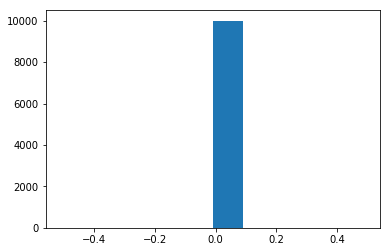

['W1', 1, 41]


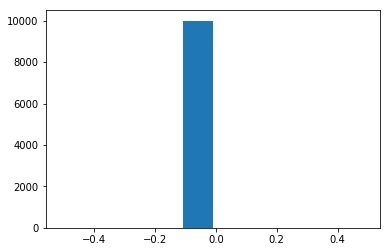

['W1', 1, 42]


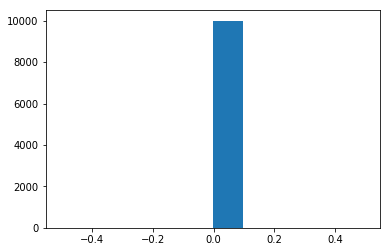

['W1', 1, 43]


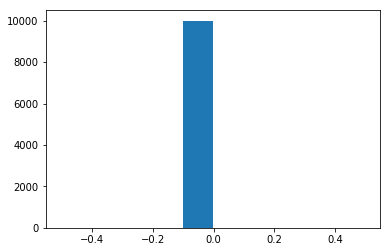

['W1', 1, 44]


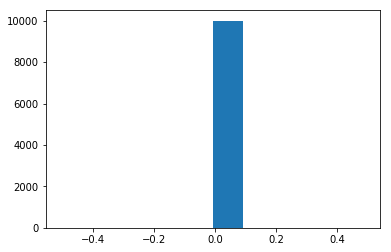

['W1', 1, 45]


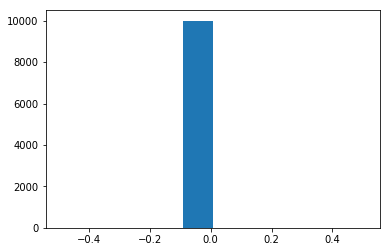

['W1', 1, 46]


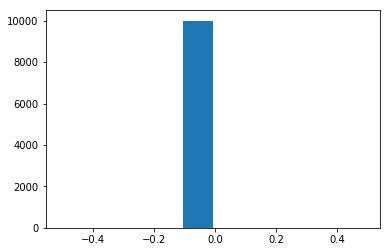

['W1', 1, 47]


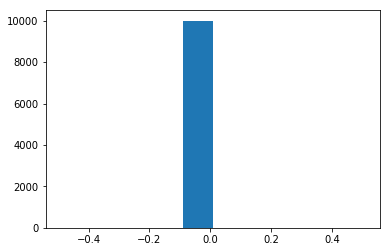

['W1', 1, 48]


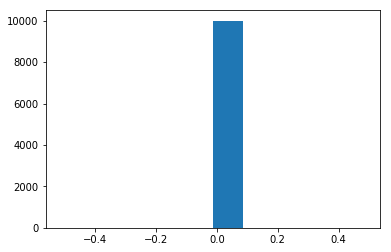

['W1', 1, 49]


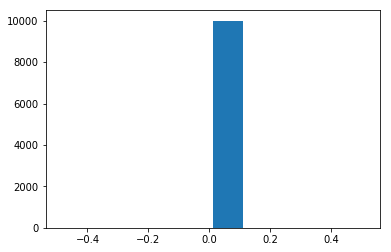

['W1', 2, 0]


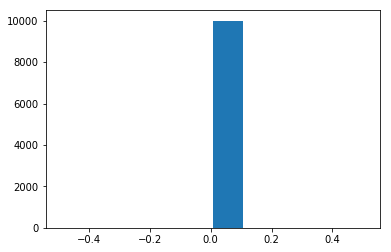

['W1', 2, 1]


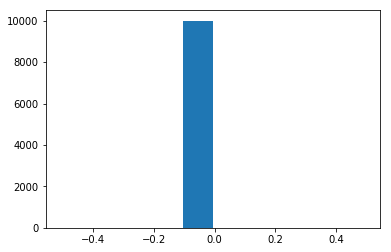

['W1', 2, 2]


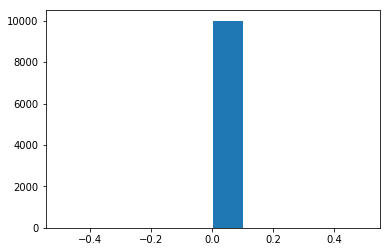

['W1', 2, 3]


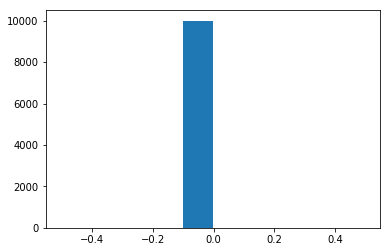

['W1', 2, 4]


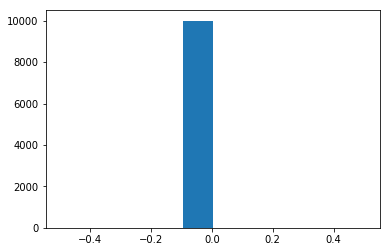

['W1', 2, 5]


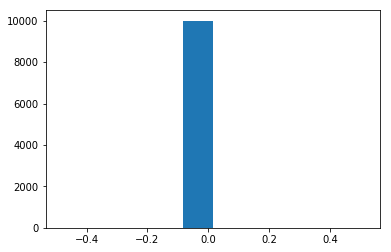

['W1', 2, 6]


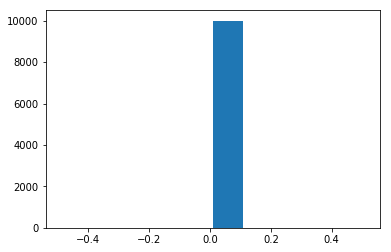

['W1', 2, 7]


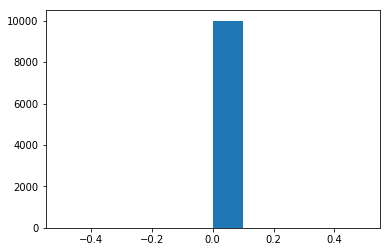

['W1', 2, 8]


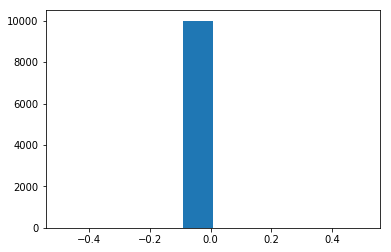

['W1', 2, 9]


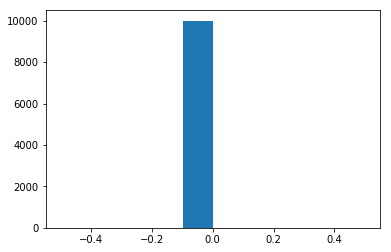

['W1', 2, 10]


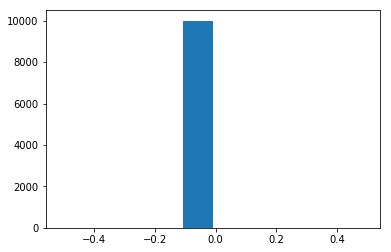

['W1', 2, 11]


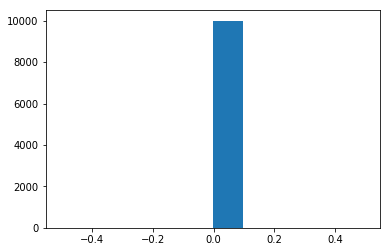

['W1', 2, 12]


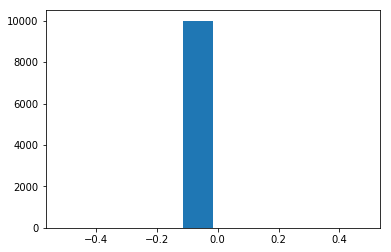

['W1', 2, 13]


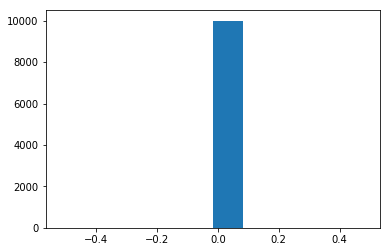

['W1', 2, 14]


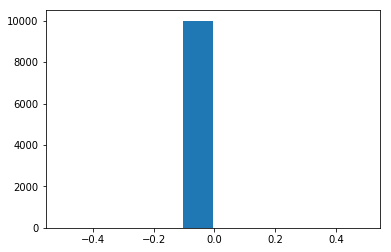

['W1', 2, 15]


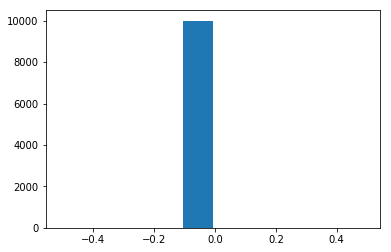

['W1', 2, 16]


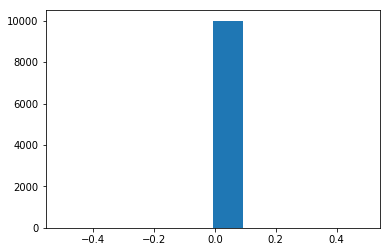

['W1', 2, 17]


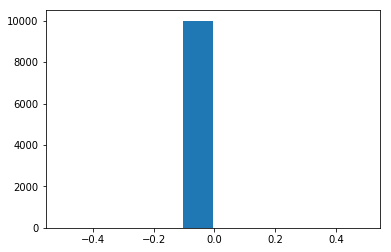

['W1', 2, 18]


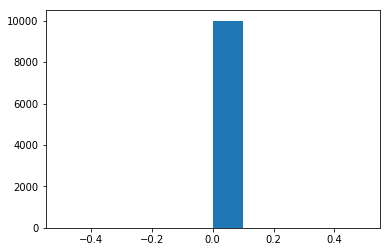

['W1', 2, 19]


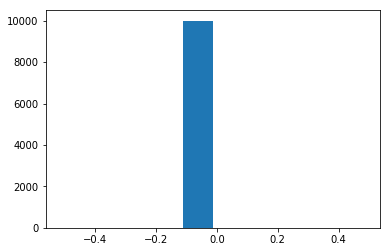

['W1', 2, 20]


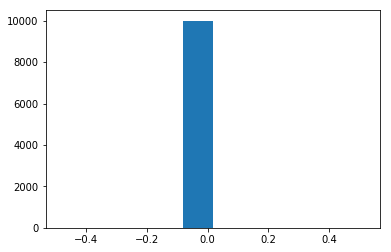

['W1', 2, 21]


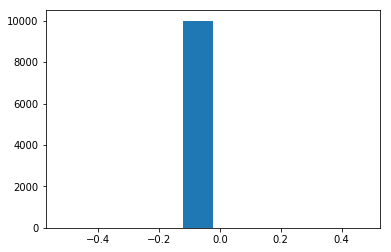

['W1', 2, 22]


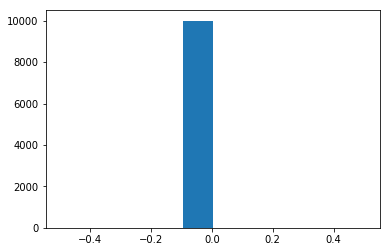

['W1', 2, 23]


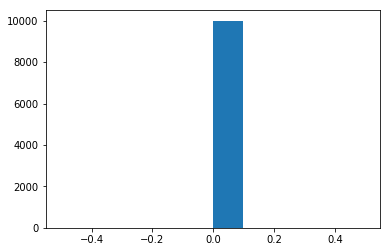

['W1', 2, 24]


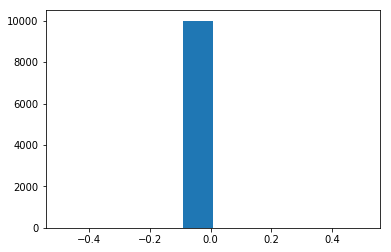

['W1', 2, 25]


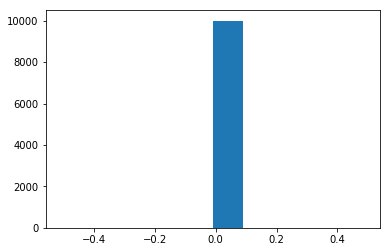

['W1', 2, 26]


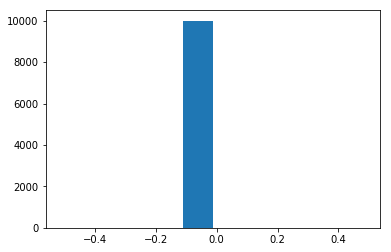

['W1', 2, 27]


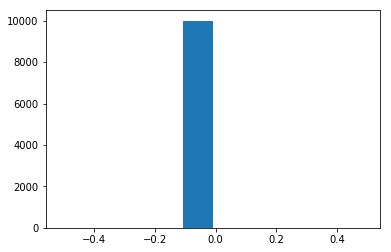

['W1', 2, 28]


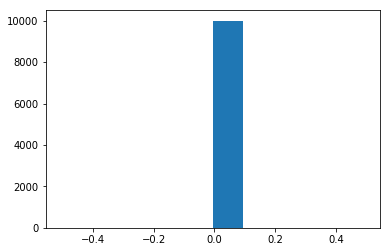

['W1', 2, 29]


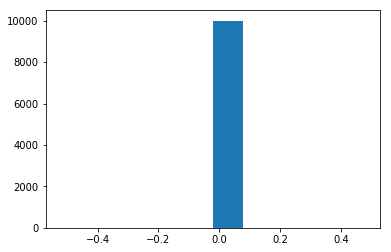

['W1', 2, 30]


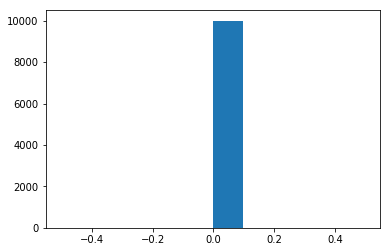

['W1', 2, 31]


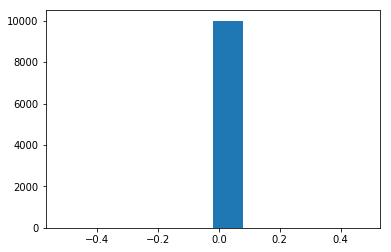

['W1', 2, 32]


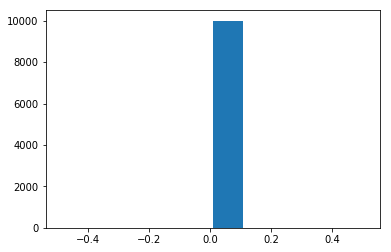

['W1', 2, 33]


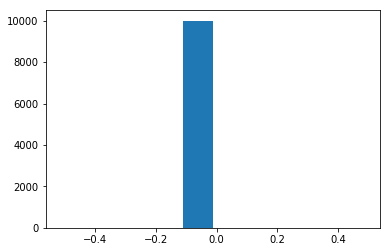

['W1', 2, 34]


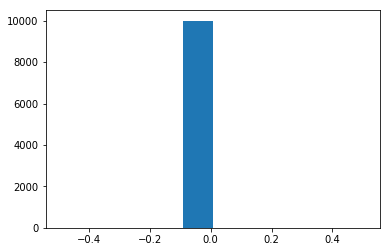

['W1', 2, 35]


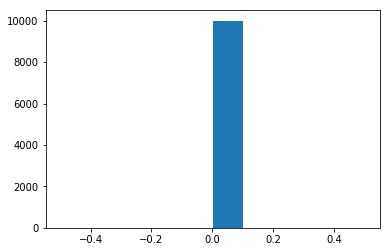

['W1', 2, 36]


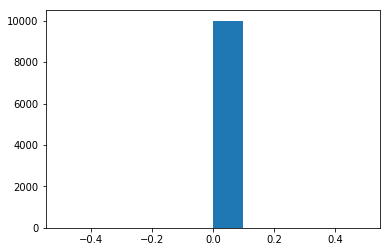

['W1', 2, 37]


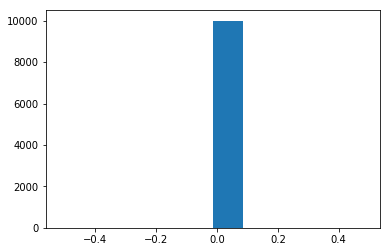

['W1', 2, 38]


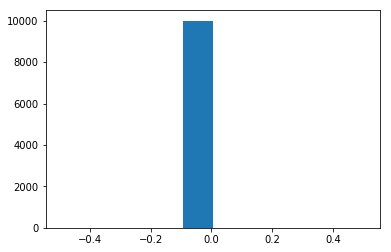

['W1', 2, 39]


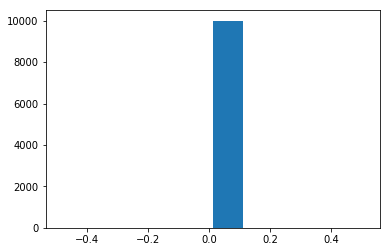

['W1', 2, 40]


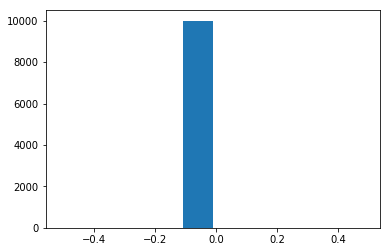

['W1', 2, 41]


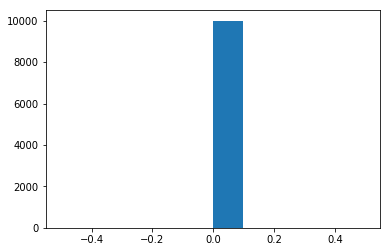

['W1', 2, 42]


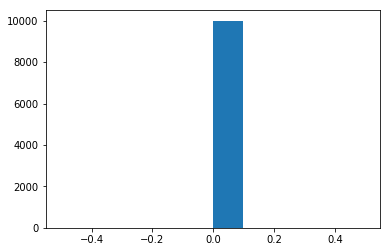

['W1', 2, 43]


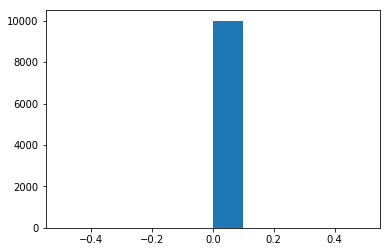

['W1', 2, 44]


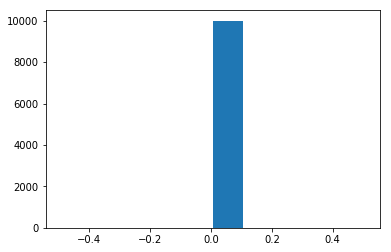

['W1', 2, 45]


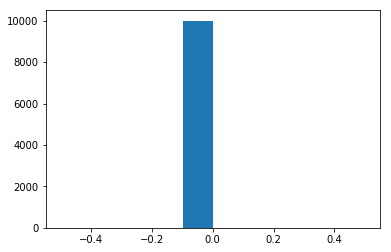

['W1', 2, 46]


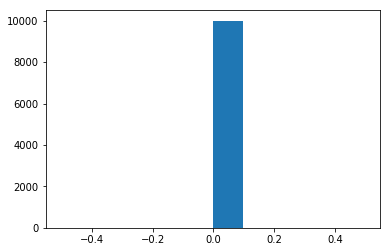

['W1', 2, 47]


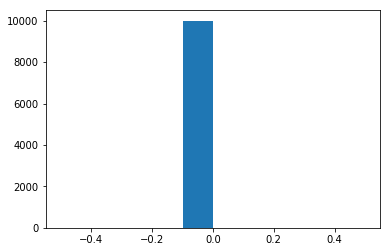

['W1', 2, 48]


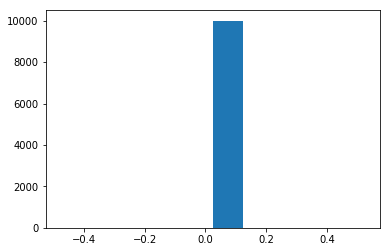

['W1', 2, 49]


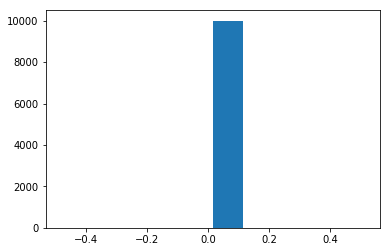

['W1', 3, 0]


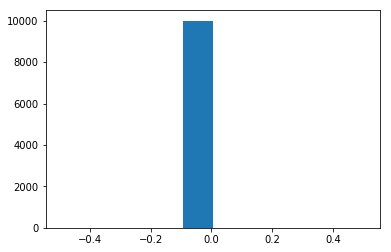

['W1', 3, 1]


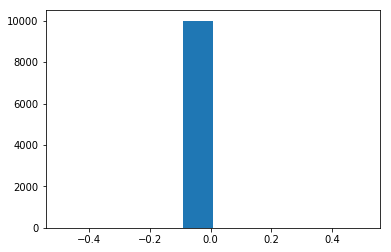

['W1', 3, 2]


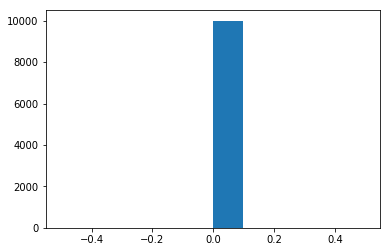

['W1', 3, 3]


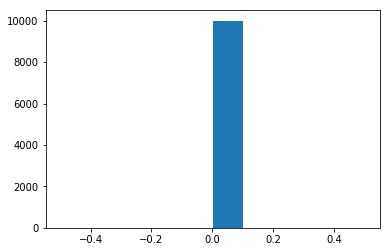

['W1', 3, 4]


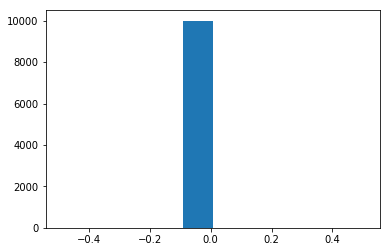

['W1', 3, 5]


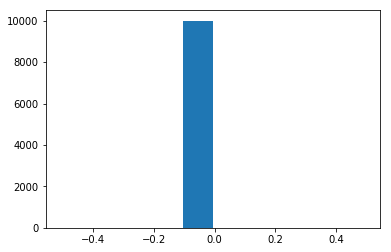

['W1', 3, 6]


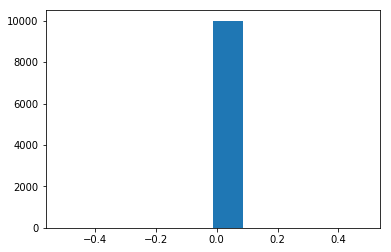

['W1', 3, 7]


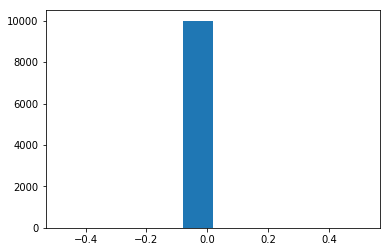

['W1', 3, 8]


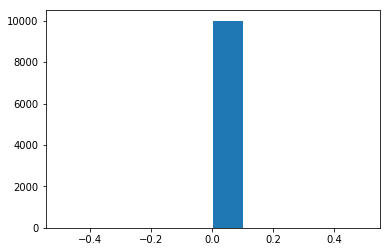

['W1', 3, 9]


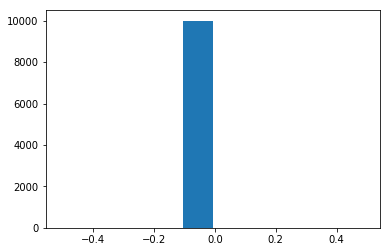

['W1', 3, 10]


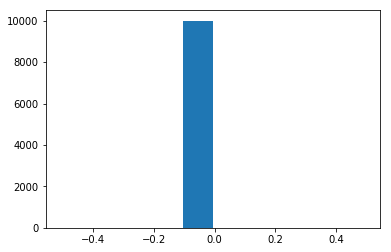

['W1', 3, 11]


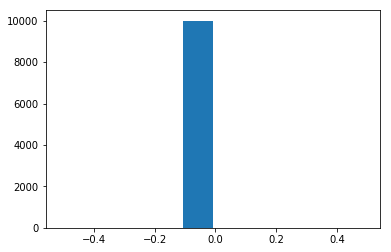

['W1', 3, 12]


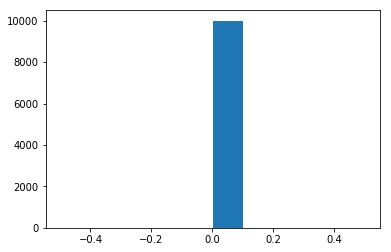

['W1', 3, 13]


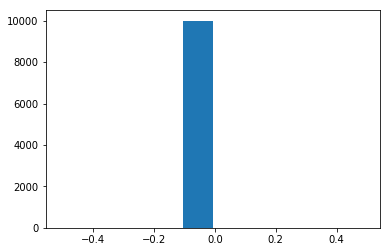

['W1', 3, 14]


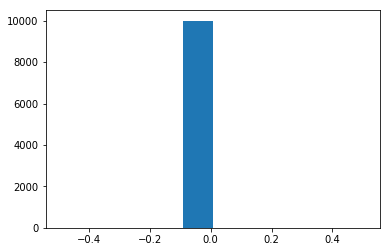

['W1', 3, 15]


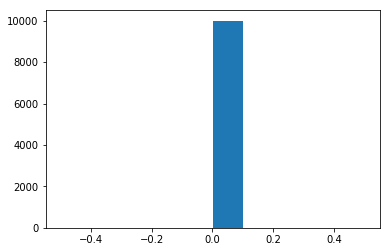

['W1', 3, 16]


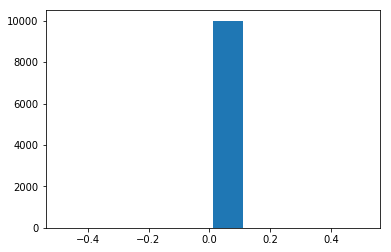

['W1', 3, 17]


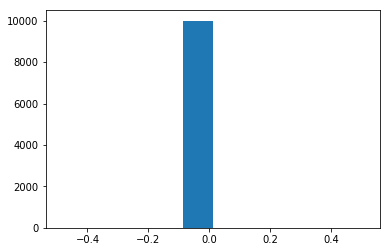

['W1', 3, 18]


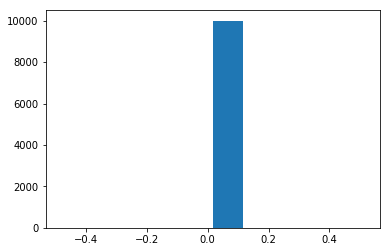

['W1', 3, 19]


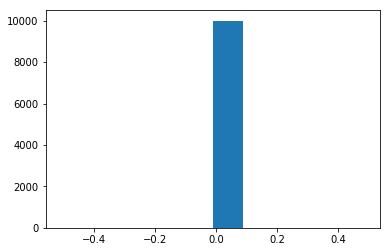

['W1', 3, 20]


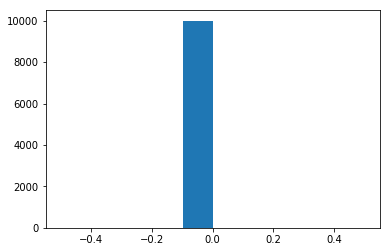

['W1', 3, 21]


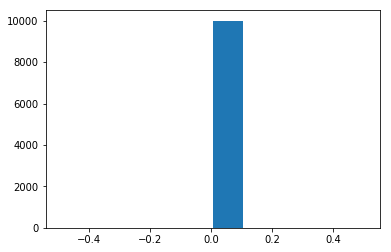

['W1', 3, 22]


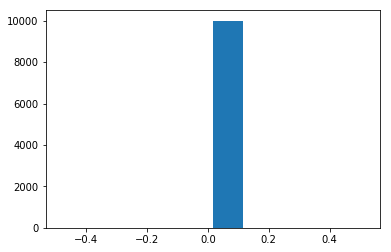

['W1', 3, 23]


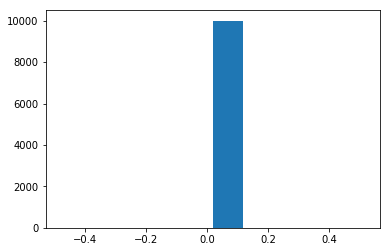

['W1', 3, 24]


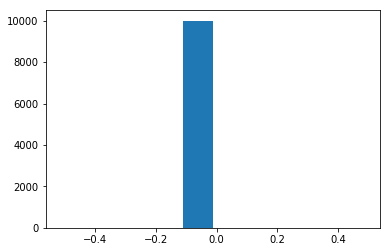

['W1', 3, 25]


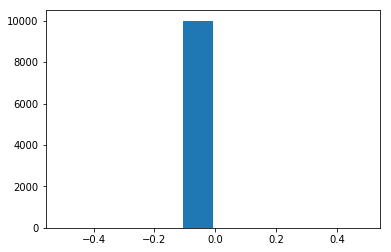

['W1', 3, 26]


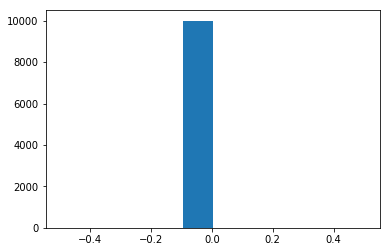

['W1', 3, 27]


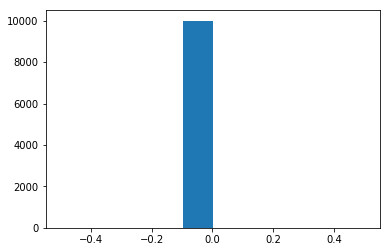

['W1', 3, 28]


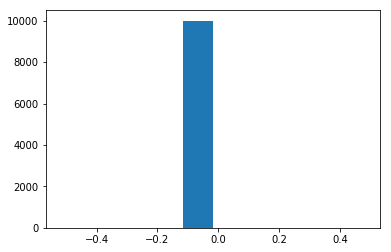

['W1', 3, 29]


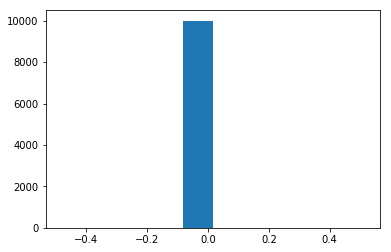

['W1', 3, 30]


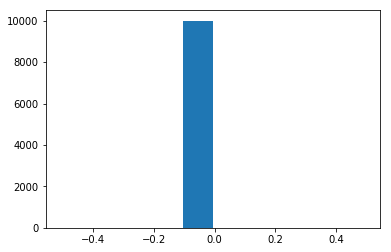

['W1', 3, 31]


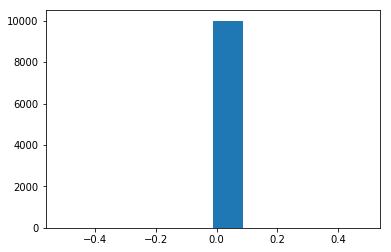

['W1', 3, 32]


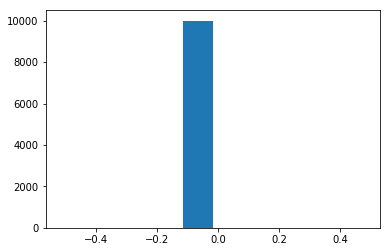

['W1', 3, 33]


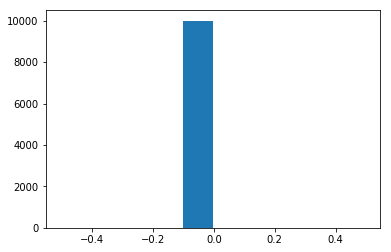

['W1', 3, 34]


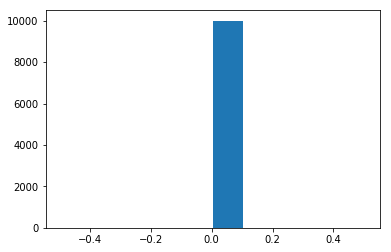

['W1', 3, 35]


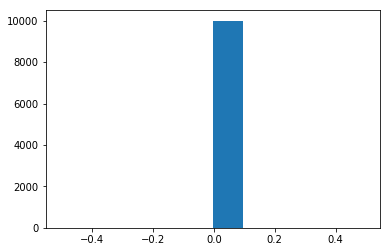

['W1', 3, 36]


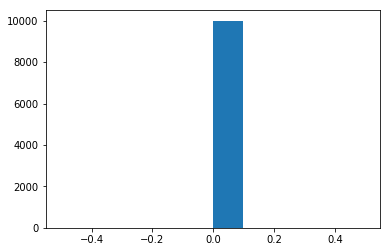

['W1', 3, 37]


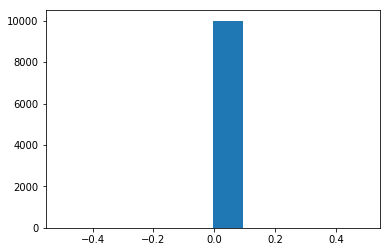

['W1', 3, 38]


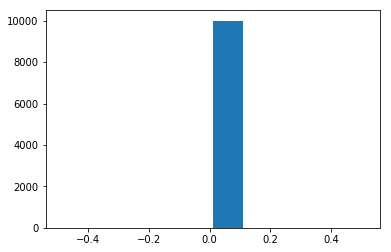

['W1', 3, 39]


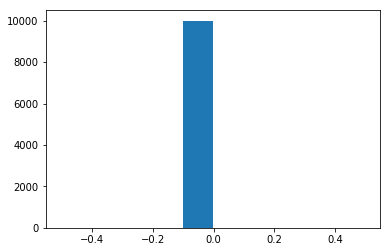

['W1', 3, 40]


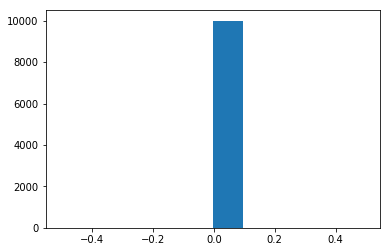

['W1', 3, 41]


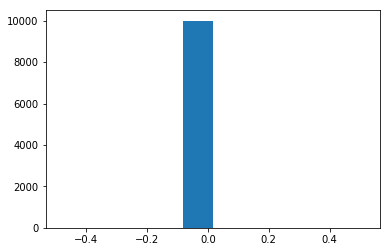

['W1', 3, 42]


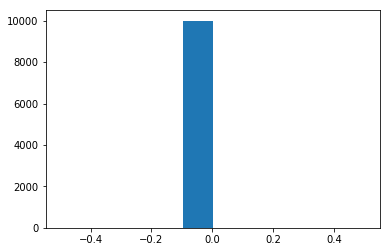

['W1', 3, 43]


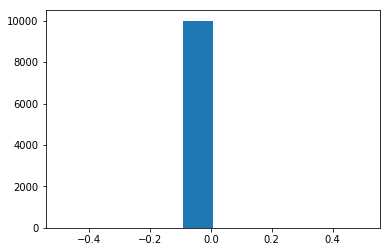

['W1', 3, 44]


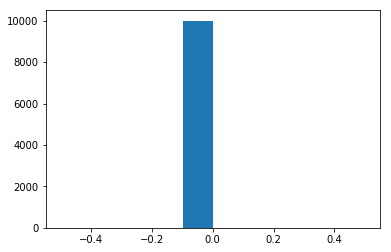

['W1', 3, 45]


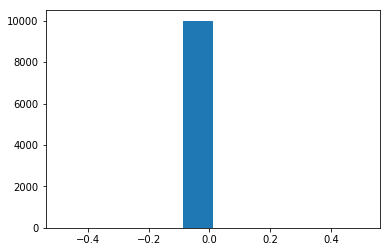

['W1', 3, 46]


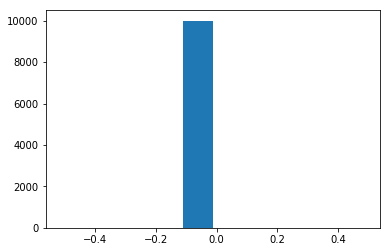

['W1', 3, 47]


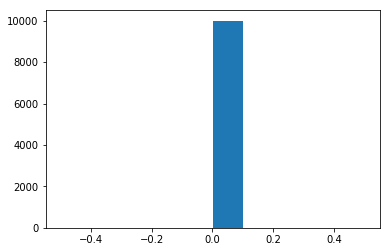

['W1', 3, 48]


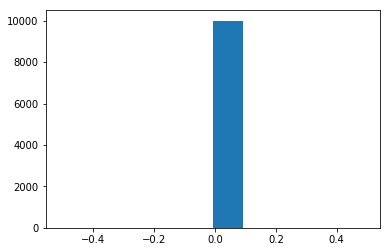

['W1', 3, 49]


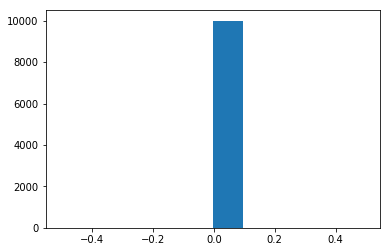

['W1', 4, 0]


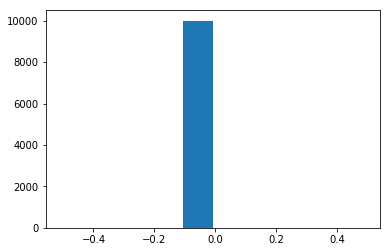

['W1', 4, 1]


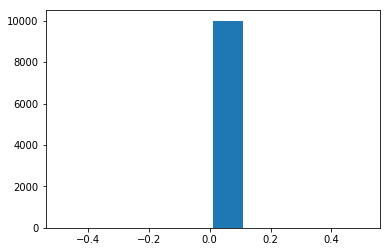

['W1', 4, 2]


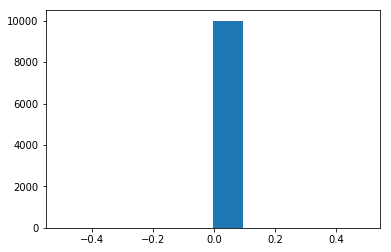

['W1', 4, 3]


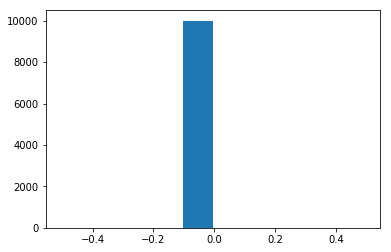

['W1', 4, 4]


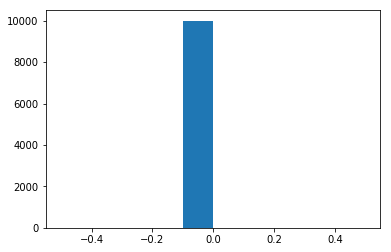

['W1', 4, 5]


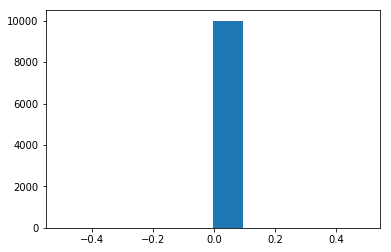

['W1', 4, 6]


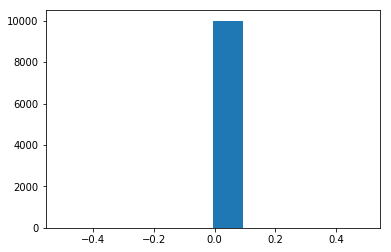

['W1', 4, 7]


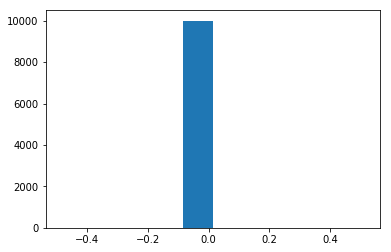

['W1', 4, 8]


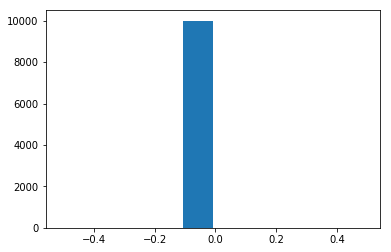

['W1', 4, 9]


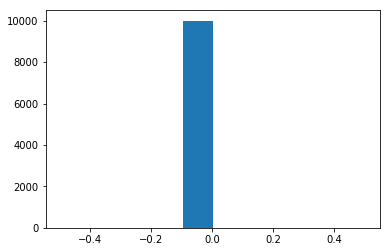

['W1', 4, 10]


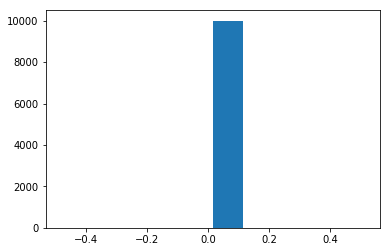

['W1', 4, 11]


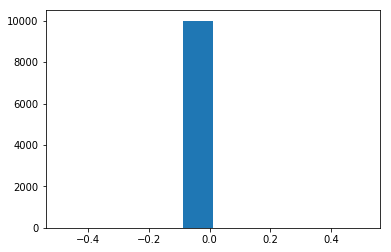

['W1', 4, 12]


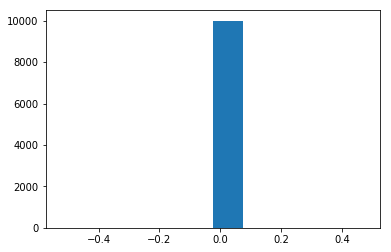

['W1', 4, 13]


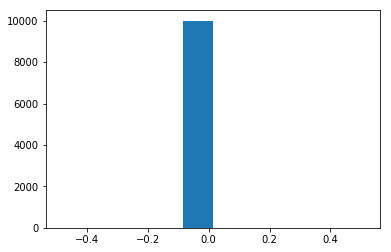

['W1', 4, 14]


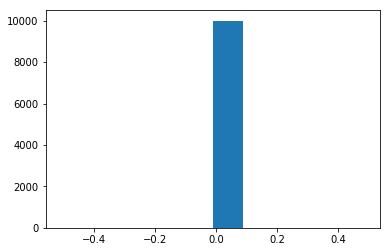

['W1', 4, 15]


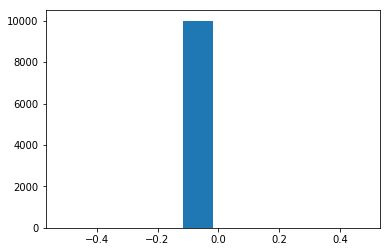

['W1', 4, 16]


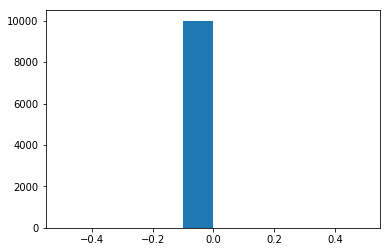

['W1', 4, 17]


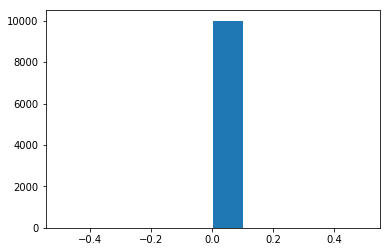

['W1', 4, 18]


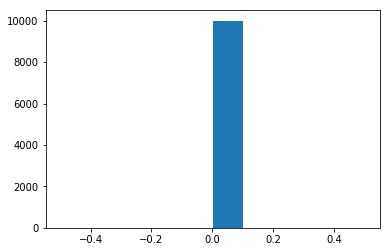

['W1', 4, 19]


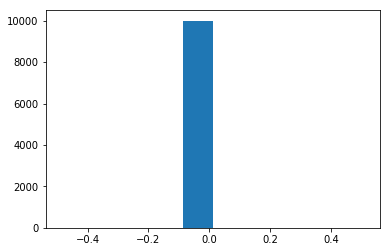

['W1', 4, 20]


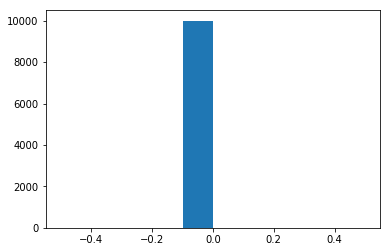

['W1', 4, 21]


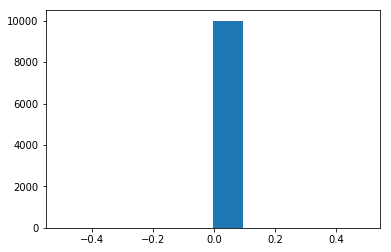

['W1', 4, 22]


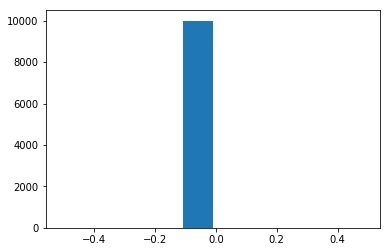

['W1', 4, 23]


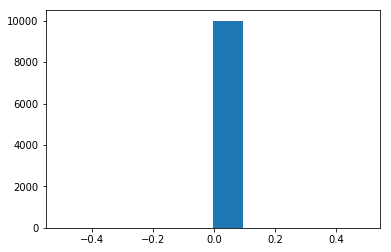

['W1', 4, 24]


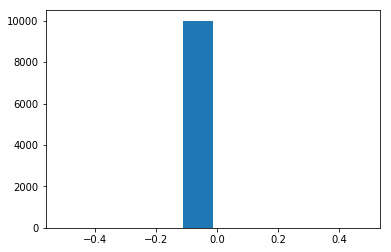

['W1', 4, 25]


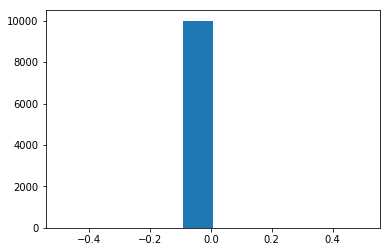

['W1', 4, 26]


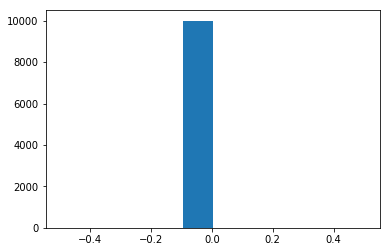

['W1', 4, 27]


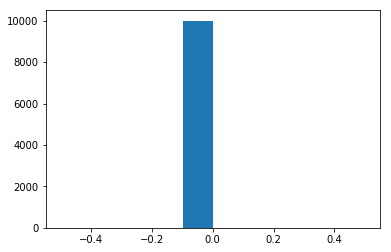

['W1', 4, 28]


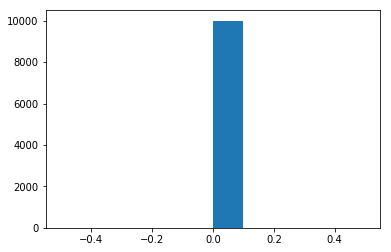

['W1', 4, 29]


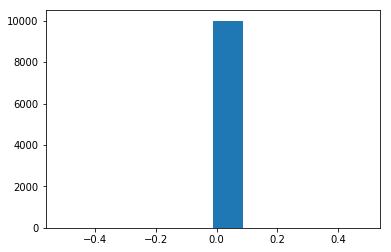

['W1', 4, 30]


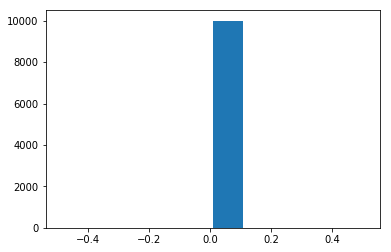

['W1', 4, 31]


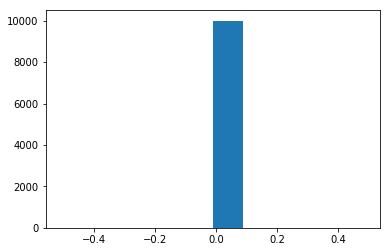

['W1', 4, 32]


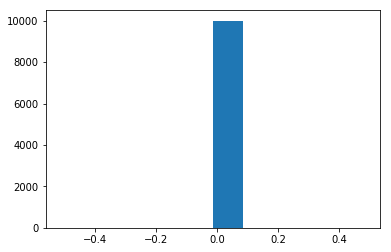

['W1', 4, 33]


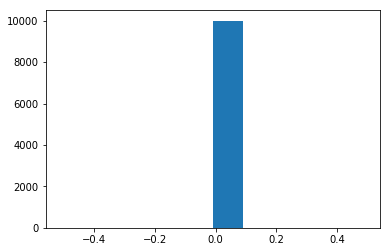

['W1', 4, 34]


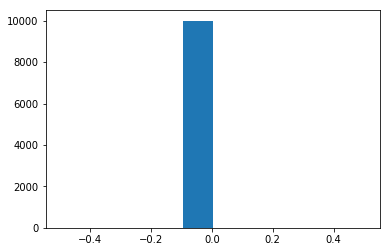

['W1', 4, 35]


KeyboardInterrupt: 

In [24]:
renji=[]#W1における全ヒストグラムの書き出し
for gyo in range(784):
    for retsu in range(50):
        print(["W1",gyo,retsu])
        tmp=W1histcreator(gyo,retsu,debug=False)
        renji.append(max(tmp)-min(tmp))

['W2', 0, 0]


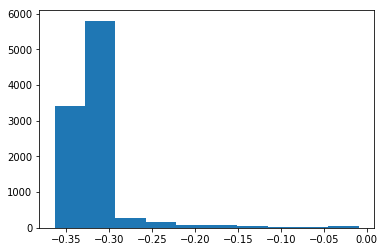

['W2', 0, 1]


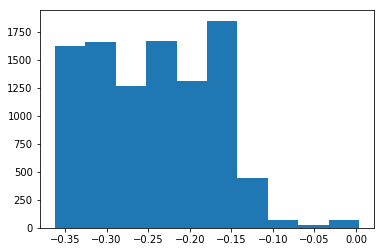

['W2', 0, 2]


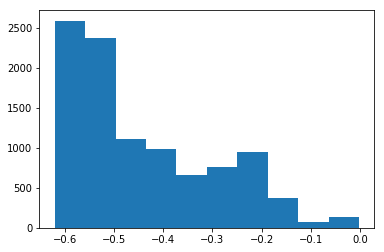

['W2', 0, 3]


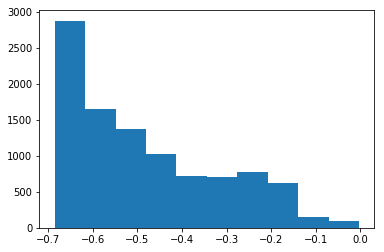

['W2', 0, 4]


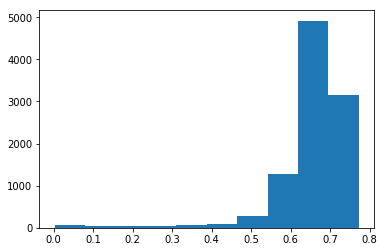

['W2', 0, 5]


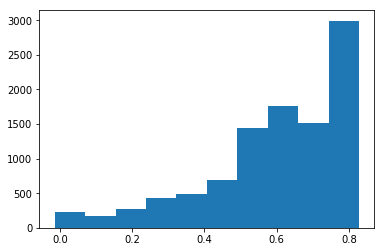

['W2', 0, 6]


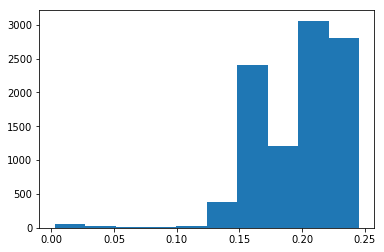

['W2', 0, 7]


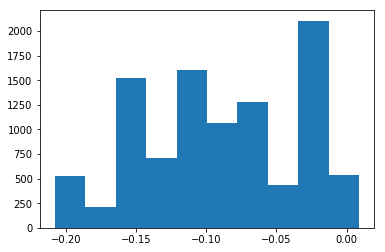

['W2', 0, 8]


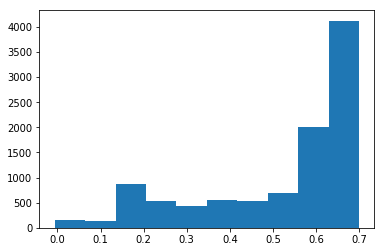

['W2', 0, 9]


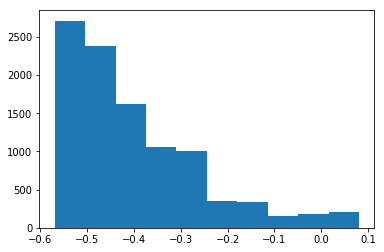

['W2', 1, 0]


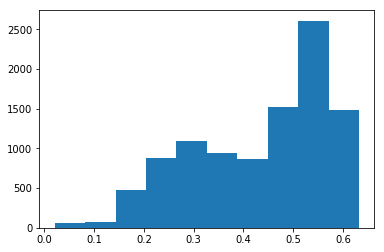

['W2', 1, 1]


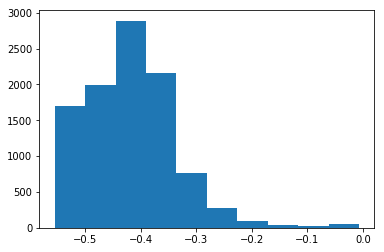

['W2', 1, 2]


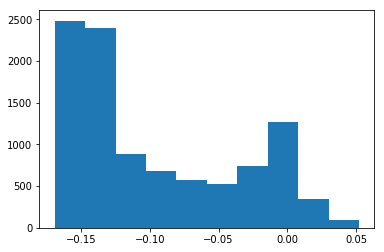

['W2', 1, 3]


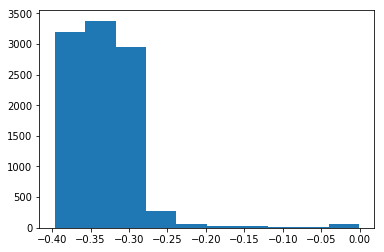

['W2', 1, 4]


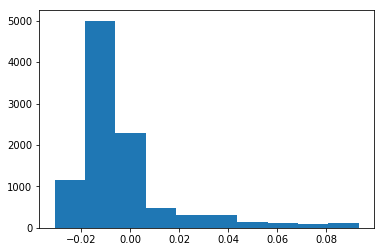

['W2', 1, 5]


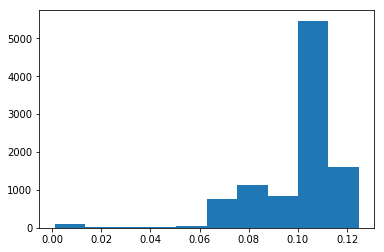

['W2', 1, 6]


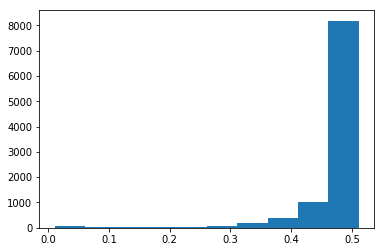

['W2', 1, 7]


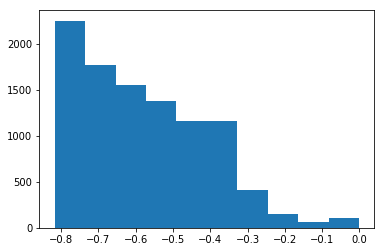

['W2', 1, 8]


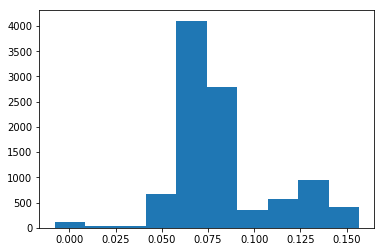

['W2', 1, 9]


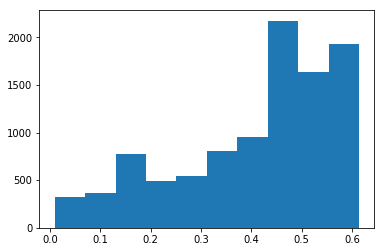

['W2', 2, 0]


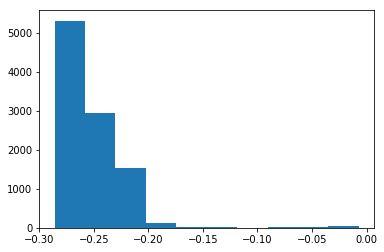

['W2', 2, 1]


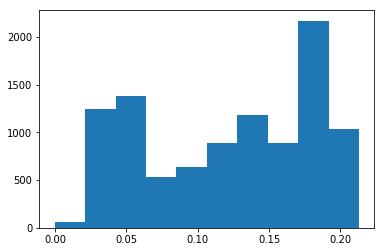

['W2', 2, 2]


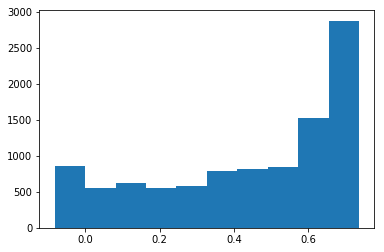

['W2', 2, 3]


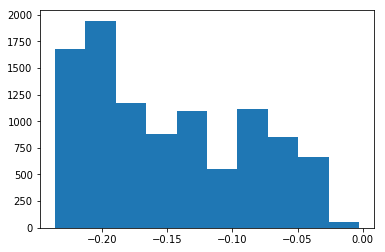

['W2', 2, 4]


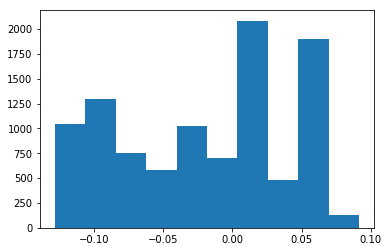

['W2', 2, 5]


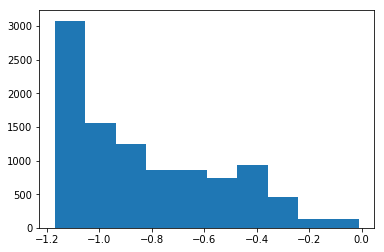

['W2', 2, 6]


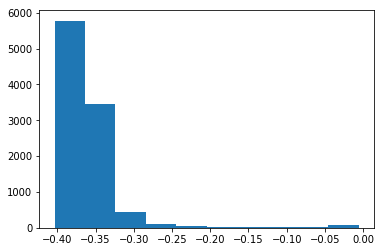

['W2', 2, 7]


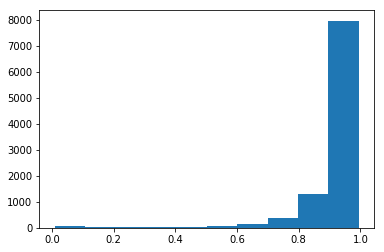

['W2', 2, 8]


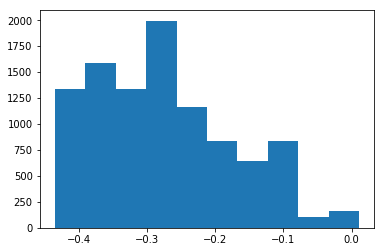

['W2', 2, 9]


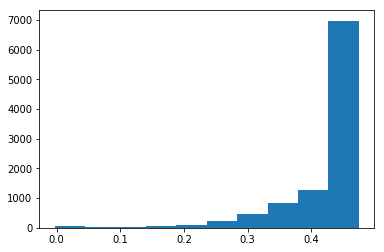

['W2', 3, 0]


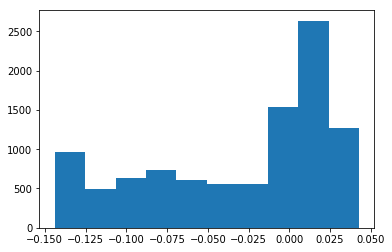

['W2', 3, 1]


KeyboardInterrupt: 

In [8]:
renji=[]#W2における全ヒストグラムの書き出し
for gyo in range(50):
    #print(gyo)
    for retsu in range(10):
        print(["W2",gyo,retsu])
        tmp=W2histcreator(gyo,retsu,debug=False)
        renji.append(max(tmp)-min(tmp))
tmp